### Experiment 5
#### WAP to train and evaluate a convolutional neural network using Keras Library to classify MNIST fashion dataset. Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


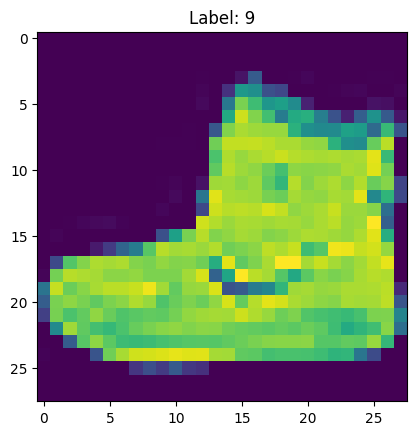

In [4]:
plt.title(f"Label: {y_train[0]}")
plt.imshow(x_train[0,:,:]);

In [5]:
def preprocess(trainData, trainLabel, depth = 10):
    x = tf.cast(trainData, dtype=tf.float32)/ 255.0
    y = tf.cast(tf.one_hot(trainLabel, depth=depth), dtype=tf.int64)

    return x, y

In [6]:
# Dataset
Xtrain = tf.data.Dataset.from_tensor_slices((x_train, y_train))\
                        .map(preprocess)\
                        .batch(128)\
                        .prefetch(tf.data.AUTOTUNE)

XVal = tf.data.Dataset.from_tensor_slices((x_val, y_val))\
                        .map(preprocess)\
                        .batch(128)\
                        .prefetch(tf.data.AUTOTUNE)

In [7]:
Xtrain

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))>

In [8]:
# Models
model3x3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(10, activation='linear')
])

model5x5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.27),
    tf.keras.layers.Dense(10, activation='linear')
])

In [9]:
model3x3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 445,322 (1.70 MB)

 Trainable params: 445,322 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model5x5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676,618 (2.58 MB)

 Trainable params: 676,618 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model3x3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics = ['accuracy', 'precision', 'recall'])

model5x5.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=5e-4),
    metrics = ['accuracy', 'precision', 'recall'])

In [12]:
import time

class TimeHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.epoch_times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.start_time
        self.epoch_times.append(elapsed_time)

time3x3 = TimeHistory()

In [13]:
# Model Training for 3x3 Filter
callback3x3 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=3, verbose=1), time3x3]

with tf.device('/device:GPU:0'):
  history3x3 = model3x3.fit(Xtrain.repeat(),
                          validation_data=XVal.repeat(),
                          epochs=50,
                          steps_per_epoch=469,
                          validation_steps=50,
                          callbacks=callback3x3)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7181 - loss: 0.7587 - precision: 0.2783 - recall: 0.9302 - val_accuracy: 0.8373 - val_loss: 0.4287 - val_precision: 0.3469 - val_recall: 0.9920 - learning_rate: 0.0020
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8775 - loss: 0.3365 - precision: 0.3503 - recall: 0.9938 - val_accuracy: 0.8827 - val_loss: 0.3262 - val_precision: 0.3711 - val_recall: 0.9927 - learning_rate: 0.0020
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8964 - loss: 0.2823 - precision: 0.3655 - recall: 0.9953 - val_accuracy: 0.8827 - val_loss: 0.3145 - val_precision: 0.3943 - val_recall: 0.9931 - learning_rate: 0.0020
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9072 - loss: 0.2493 - precision: 0.3827 - recall: 0.9959 - val_accuracy: 0.8953 - val_loss: 0.3071 - val_precision: 0.4140 - val_recall: 0.9934 - learning_rate: 0.0020
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accur

In [14]:
# Model Training for 5x5 Filter
time5x5 = TimeHistory()
callback5x5 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=3, verbose=1), time5x5]

with tf.device('/device:GPU:0'):
  history5x5 = model5x5.fit(Xtrain.repeat(),
                          validation_data=XVal.repeat(),
                          epochs=50,
                          steps_per_epoch=469,
                          validation_steps=25,
                          callbacks=callback5x5)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6725 - loss: 0.8905 - precision: 0.2492 - recall: 0.9179 - val_accuracy: 0.8528 - val_loss: 0.4164 - val_precision: 0.3173 - val_recall: 0.9912 - learning_rate: 5.0000e-04
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8610 - loss: 0.3883 - precision: 0.3380 - recall: 0.9910 - val_accuracy: 0.8797 - val_loss: 0.3326 - val_precision: 0.3722 - val_recall: 0.9919 - learning_rate: 5.0000e-04
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8859 - loss: 0.3164 - precision: 0.3850 - recall: 0.9917 - val_accuracy: 0.8947 - val_loss: 0.2923 - val_precision: 0.4251 - val_recall: 0.9928 - learning_rate: 5.0000e-04
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8984 - loss: 0.2758 - precision: 0.4285 - recall: 0.9915 - val_accuracy: 0.9056 - val_loss: 0.2733 - val_precision: 0.4817 - val_recall: 0.9891 - learning_rate: 5.0000e-04
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8

In [15]:
model3x3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-3),
    metrics = ['accuracy', 'precision', 'recall'])

model5x5.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4),
    metrics = ['accuracy', 'precision', 'recall'])

In [16]:
time3x3Rms = TimeHistory()
callback3x3Rms = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=3, verbose=1), time3x3Rms]

with tf.device('/device:GPU:0'):
  history3x3Rms = model3x3.fit(Xtrain.repeat(),
                          validation_data=XVal.repeat(),
                          epochs=50,
                          steps_per_epoch=469,
                          validation_steps=50,
                          callbacks=callback3x3Rms)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9526 - loss: 0.1227 - precision: 0.4945 - recall: 0.9991 - val_accuracy: 0.9003 - val_loss: 0.3967 - val_precision: 0.5426 - val_recall: 0.9875 - learning_rate: 0.0020
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9590 - loss: 0.1106 - precision: 0.5530 - recall: 0.9982 - val_accuracy: 0.9045 - val_loss: 0.4581 - val_precision: 0.5789 - val_recall: 0.9830 - learning_rate: 0.0020
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9602 - loss: 0.1038 - precision: 0.5976 - recall: 0.9978 - val_accuracy: 0.8934 - val_loss: 0.4859 - val_precision: 0.6262 - val_recall: 0.9755 - learning_rate: 0.0020
Epoch 4/50
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9618 - loss: 0.0999 - precision: 0.6452 - recall: 0.9970
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9618 - loss: 0.0999 - precision: 0.6452 -

In [17]:
time5x5Adam = TimeHistory()
callback5x5Adam = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=3, verbose=1), time5x5Adam]

with tf.device('/device:GPU:0'):
  history5x5Adam = model5x5.fit(Xtrain.repeat(),
                          validation_data=XVal.repeat(),
                          epochs=50,
                          steps_per_epoch=469,
                          validation_steps=25,
                          callbacks=callback5x5Adam)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9564 - loss: 0.1177 - precision: 0.6898 - recall: 0.9911 - val_accuracy: 0.9166 - val_loss: 0.2782 - val_precision: 0.7054 - val_recall: 0.9703 - learning_rate: 5.0000e-04
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9565 - loss: 0.1145 - precision: 0.6768 - recall: 0.9933 - val_accuracy: 0.9181 - val_loss: 0.2690 - val_precision: 0.6894 - val_recall: 0.9772 - learning_rate: 5.0000e-04
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9623 - loss: 0.1028 - precision: 0.6765 - recall: 0.9929 - val_accuracy: 0.9250 - val_loss: 0.2684 - val_precision: 0.6912 - val_recall: 0.9756 - learning_rate: 5.0000e-04
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9643 - loss: 0.0943 - precision: 0.6868 - recall: 0.9938 - val_accuracy: 0.9159 - val_loss: 0.2825 - val_precision: 0.6796 - val_recall: 0.9731 - learning_rate: 5.0000e-04
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [26]:
import pandas as pd

accuracyRecord = [
    history3x3.history["accuracy"][-1],
    history3x3Rms.history["accuracy"][-1],
    history5x5Adam.history["accuracy"][-1],
    history5x5.history["accuracy"][-1]
]

valRecord = [
    history3x3.history["val_accuracy"][-1],
    history3x3Rms.history["val_accuracy"][-1],
    history5x5Adam.history["val_accuracy"][-1],
    history5x5.history["val_accuracy"][-1]
]

lossRecord = [
    history3x3.history["loss"][-1],
    history3x3Rms.history["loss"][-1],
    history5x5Adam.history["loss"][-1],
    history5x5.history["loss"][-1]
]

filterRecord = ["3x3", "3x3", "5x5", "5x5"]
optimizerRecord = ["Adam", "RMSprop", "Adam", "RMSprop"]

records = pd.DataFrame({
    "Filters": filterRecord,
    "Optimizer": optimizerRecord,
    "Accuracy": accuracyRecord,
    "Loss": lossRecord,
    "Validation Accuracy": valRecord
})

records

,Filters,Optimizer,Accuracy,Loss,Validation Accuracy
0,3x3,Adam,0.981083,0.052742,0.919375
1,3x3,RMSprop,0.993350,0.018565,0.912969
2,5x5,Adam,0.991017,0.028904,0.927188
3,5x5,RMSprop,0.974883,0.072825,0.925937


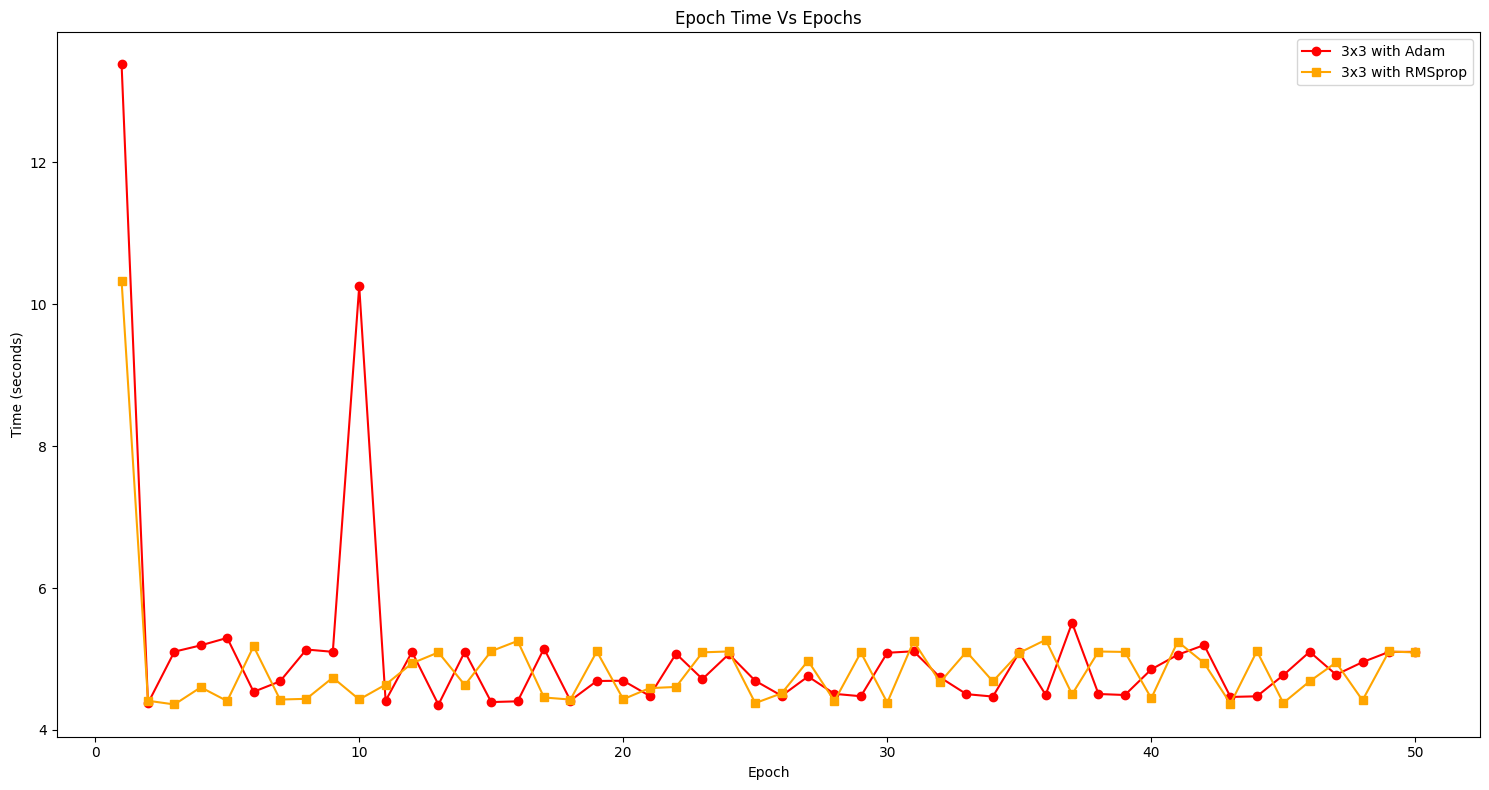

In [19]:
# Time Comparision
epochs = range(1, len(time3x3.epoch_times) + 1)

plt.figure(figsize=(15, 8))

plt.plot(epochs, time3x3.epoch_times, marker='o', linestyle='-', color='r')
plt.plot(epochs, time3x3Rms.epoch_times, marker='s', linestyle='-', color='#FFA500')
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.legend(["3x3 with Adam", "3x3 with RMSprop"])
plt.title("Epoch Time Vs Epochs")

plt.tight_layout()
plt.show()

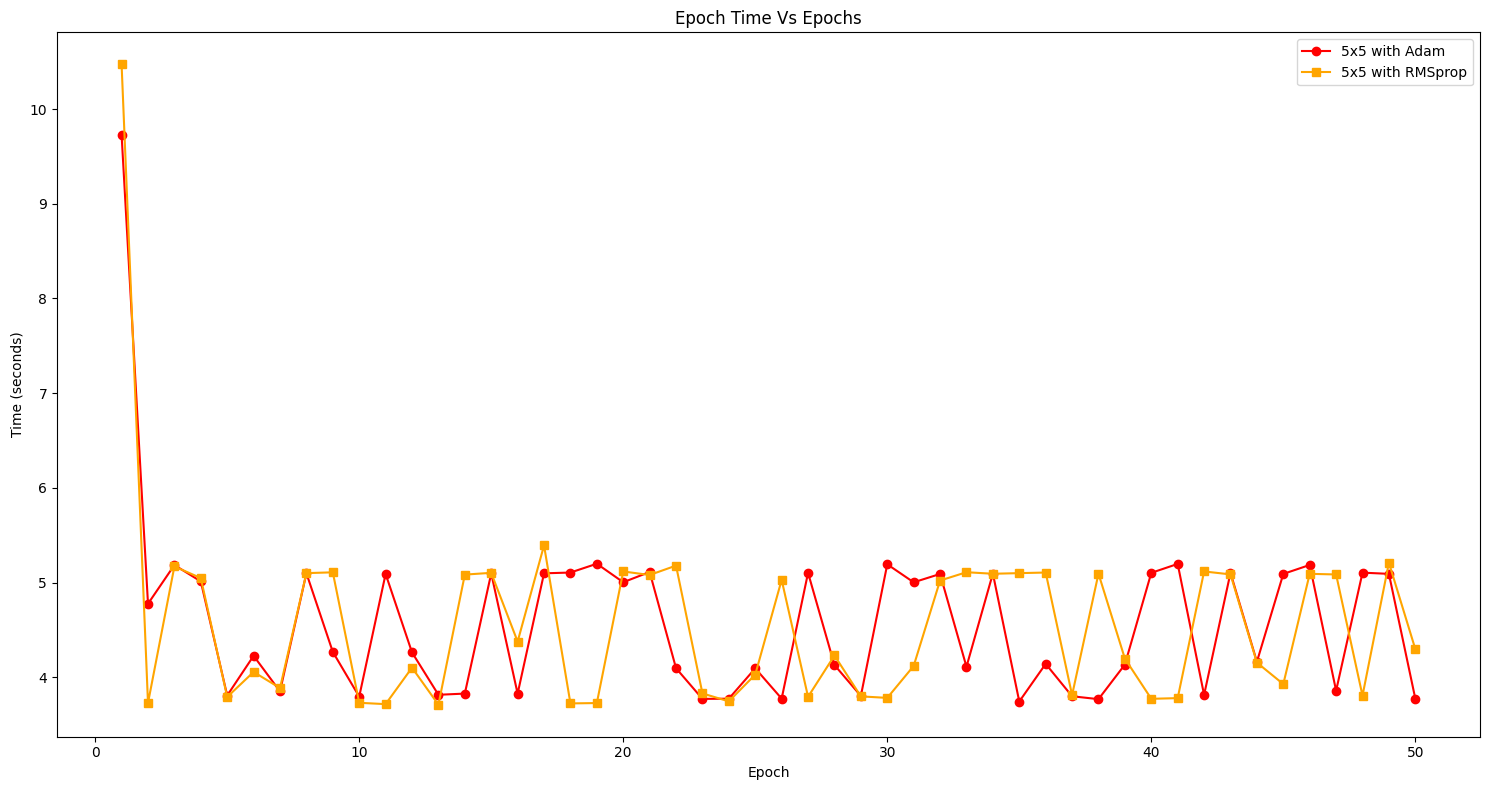

In [20]:
plt.figure(figsize=(15, 8))

plt.plot(epochs, time5x5Adam.epoch_times, marker='o', linestyle='-', color='r')
plt.plot(epochs, time5x5.epoch_times, marker='s', linestyle='-', color='#FFA500')
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.legend(["5x5 with Adam", "5x5 with RMSprop"])
plt.title("Epoch Time Vs Epochs")

plt.tight_layout()
plt.show()

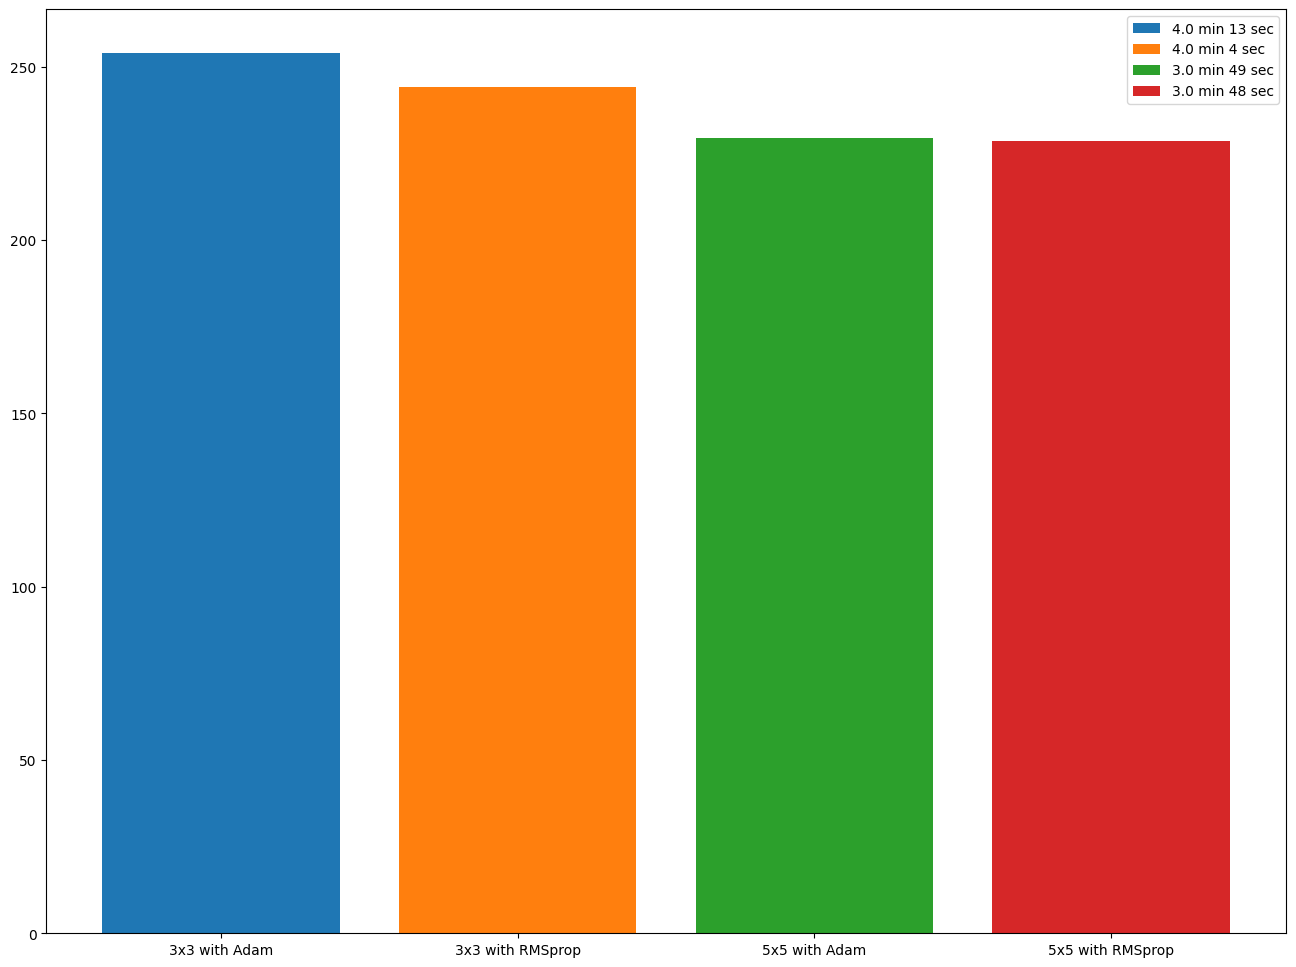

In [34]:
import numpy as np
totalTime3x3 = np.sum(time3x3.epoch_times)
totalTime5x5 = np.sum(time5x5.epoch_times)
totalTime3x3Rms = np.sum(time3x3Rms.epoch_times)
totalTime5x5Adam = np.sum(time5x5Adam.epoch_times)

plt.figure(figsize=(16,12))
plt.bar(x=["3x3 with Adam"],height=[totalTime3x3])
plt.bar(x=["3x3 with RMSprop"],height=[totalTime3x3Rms])
plt.bar(x=["5x5 with Adam"],height=[totalTime5x5Adam])
plt.bar(x=["5x5 with RMSprop"],height=[totalTime5x5])
plt.legend([f"{totalTime3x3//60} min {int(totalTime3x3%60)} sec", f"{totalTime3x3Rms//60} min {int(totalTime3x3Rms%60)} sec", f"{totalTime5x5Adam//60} min {int(totalTime5x5Adam%60)} sec", f"{totalTime5x5//60} min {int(totalTime5x5%60)} sec"]);

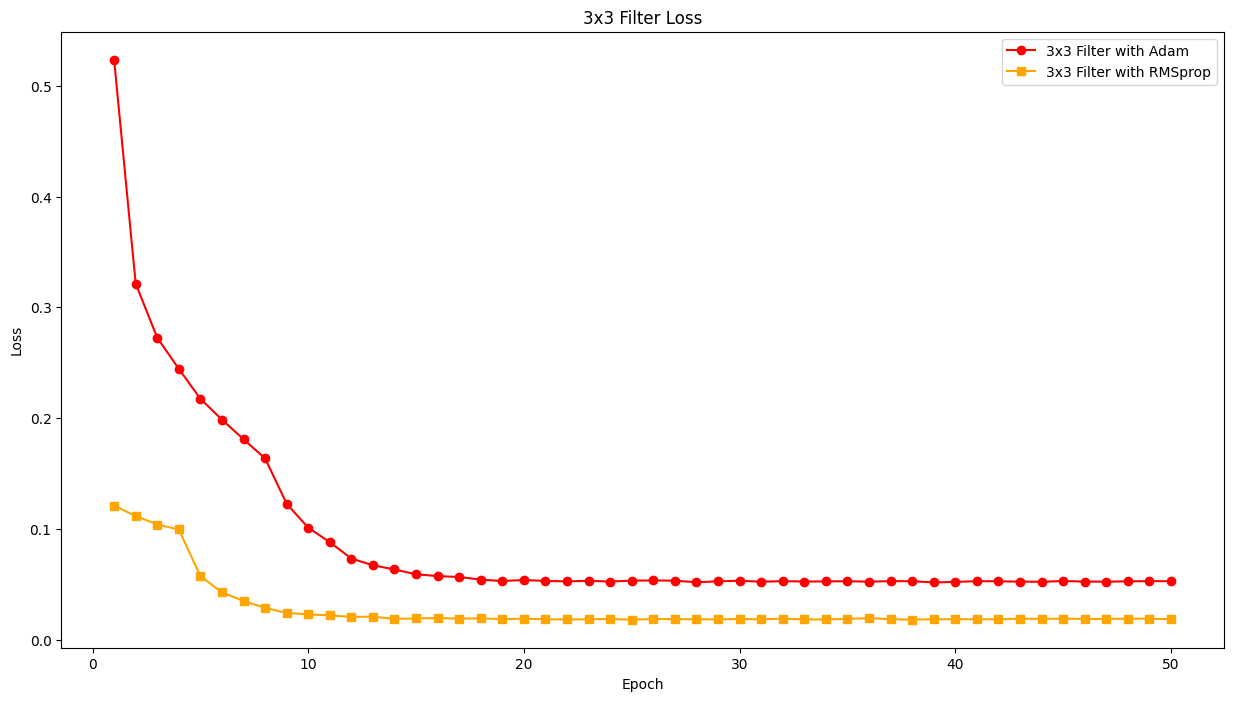

In [22]:
# Loss Comparision
plt.figure(figsize=(15, 8))
plt.plot(epochs, history3x3.history["loss"], label="3x3 Filter with Adam", marker='o', color='r')
plt.plot(epochs, history3x3Rms.history["loss"], label="3x3 Filter with RMSprop", marker='s', color='#FFA500')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("3x3 Filter Loss")
plt.legend();

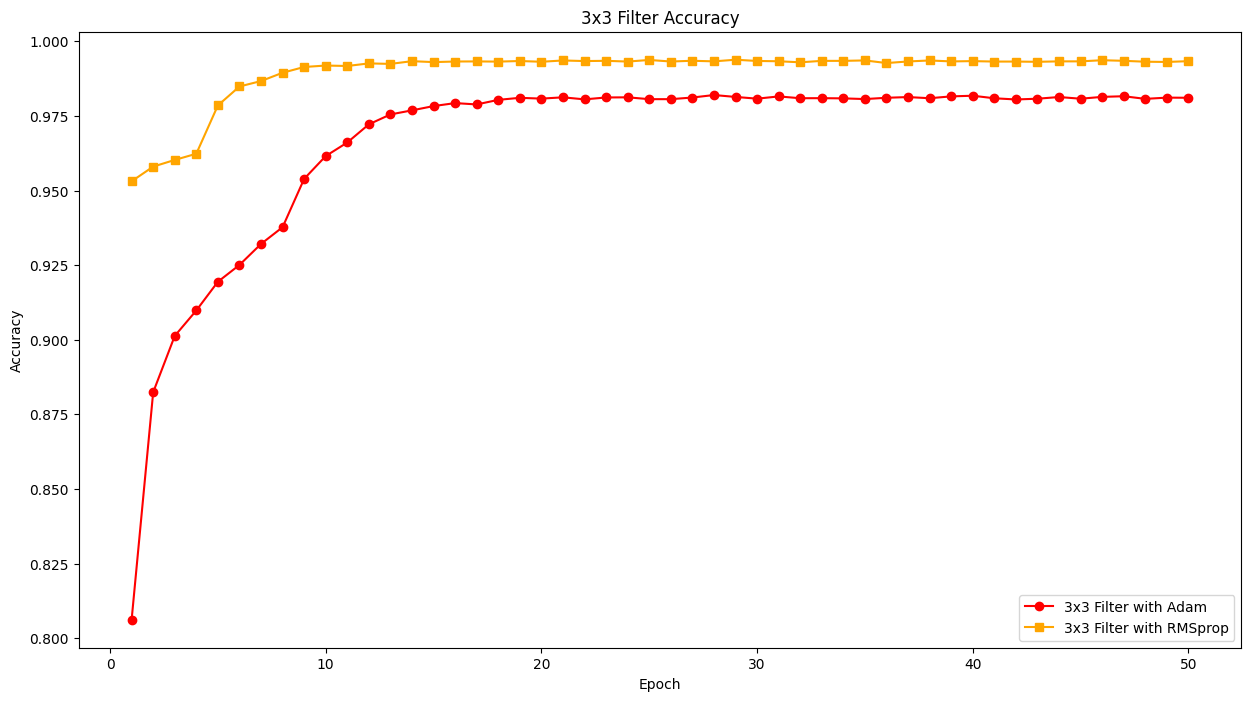

In [23]:
# Accuracy Comparision
plt.figure(figsize=(15, 8))
plt.plot(epochs, history3x3.history["accuracy"], label="3x3 Filter with Adam", marker='o', color='r')
plt.plot(epochs, history3x3Rms.history["accuracy"], label="3x3 Filter with RMSprop", marker='s', color='#FFA500')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("3x3 Filter Accuracy")
plt.legend();

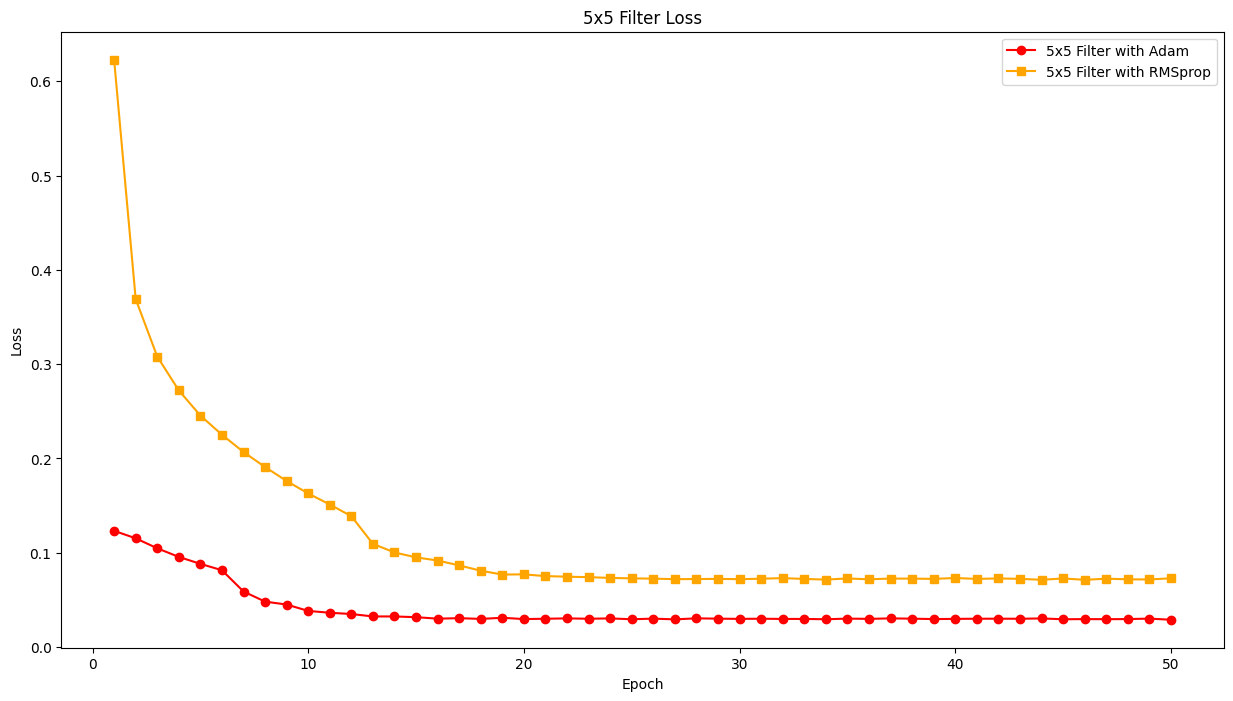

In [24]:
# Loss Comparision
plt.figure(figsize=(15, 8))
plt.plot(epochs, history5x5Adam.history["loss"], label="5x5 Filter with Adam", marker='o', color='r')
plt.plot(epochs, history5x5.history["loss"], label="5x5 Filter with RMSprop", marker='s', color='#FFA500')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("5x5 Filter Loss")
plt.legend();

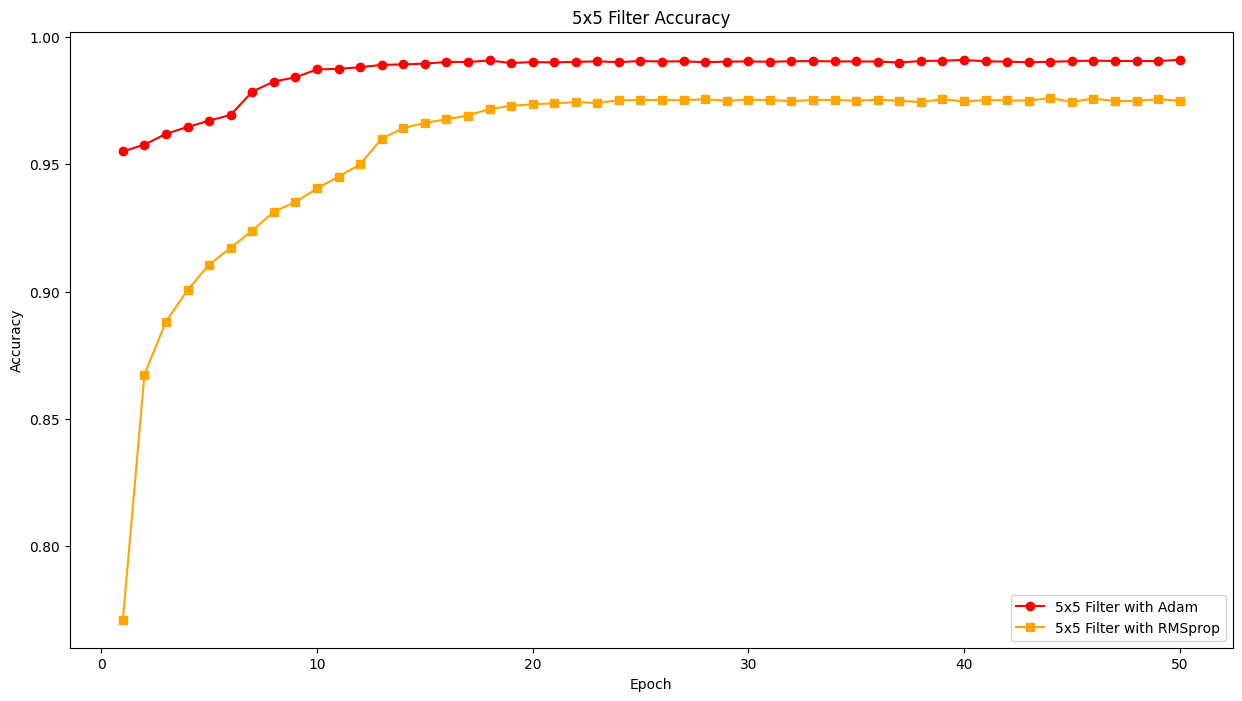

In [25]:
# Accuracy Comparision
plt.figure(figsize=(15, 8))
plt.plot(epochs, history5x5Adam.history["accuracy"], label="5x5 Filter with Adam", marker='o', color='r')
plt.plot(epochs, history5x5.history["accuracy"], label="5x5 Filter with RMSprop", marker='s', color='#FFA500')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("5x5 Filter Accuracy")
plt.legend();

# **Model Description:**

### **Introduction**
This project implements two **CNN** architectures to classify images from the Fashion MNIST dataset. The architectures differ based on the size of filters used in their layers:  

- **model3x3:** Uses 3×3 convolutional filters  
- **model5x5:** Uses 5×5 convolutional filters  

### **Model Architectures**
#### **1. CNN with 3×3 Filters**
This model consists of three convolutional layers, each using **3×3 filters**, followed by max pooling layers. The extracted features are passed through a fully connected dense layer and a final output layer.

##### **Architecture Details:**
- **Input Layer:** 28×28 grayscale image  
- **Conv2D (64 filters, 3×3, ReLU)**  
- **MaxPooling2D (2×2 pooling)**  
- **Conv2D (64 filters, 3×3, ReLU)**  
- **MaxPooling2D (2×2 pooling)**  
- **Conv2D (64 filters, 3×3, ReLU)**  
- **Flatten Layer**  
- **Dense (128 neurons, ReLU)**  
- **Dense (10 neurons, Linear)**  

**Compilation & Training:**  
- **Loss Function:** `CategoricalCrossentropy(from_logits=True)`  
- **Optimizer:** Adam & RMSprop  
- **Metrics:** Accuracy, Precision, Recall  
- **Callbacks:** `ReduceLROnPlateau`, `TimeHistory`
- **Epochs:** 50  

#### **2. CNN with 5×5 Filters**
This model follows a similar structure but uses **5×5 filters**. It has two convolutional layers, followed by fully connected layers.

##### **Architecture Details:**
- **Input Layer:** 28×28 grayscale image  
- **Conv2D (64 filters, 5×5, ReLU)**  
- **MaxPooling2D (2×2 pooling)**  
- **Conv2D (64 filters, 5×5, ReLU)**  
- **MaxPooling2D (2×2 pooling)**  
- **Flatten Layer**  
- **Dense (128 neurons, ReLU )**  
- **Dense (10 neurons, Linear )**  

**Compilation & Training:**  
- **Loss Function:** `CategoricalCrossentropy(from_logits=True)`  
- **Optimizer:** Adam and RMSprop   
- **Metrics:** Accuracy, Precision, Recall  
- **Callbacks:** `ReduceLROnPlateau`, `TimeHistory`
- **Epochs:** 50  

### **Training & Evaluation**
- All models are trained on **Fashion MNIST** with 50 epochs and validation is performed.  
- ReduceLROnPlateau dynamically adjusts the learning rate when `val_loss` stagnates.  
- Training time is tracked to compare efficiency.  
- The evaluation will compare:
  - **Accuracy:** How well the model predicts the correct labels.  
  - **Precision:** How many predicted positives are actually correct.  
  - **Recall:** How many actual positives were identified correctly.  


# **Code Description**

### **1. Dataset: Fashion MNIST**
- Fashion MNIST is a dataset of **28x28 grayscale images** representing 10 different clothing categories.  
- The dataset is split into training and validation sets.  
- **Preprocessing:** Images are **normalized between 0-1**, and labels are **one-hot encoded** for multi-class classification.


### **2. Convolutional Neural Networks (CNNs)**
CNNs are deep learning models designed for **image classification**. They extract hierarchical features using convolutional and pooling layers.  
#### **Key Layers in CNNs:**
- **Convolutional Layer**: Detects patterns in images using small filters (kernels).  
- **Activation Function**: Introduces non-linearity for better learning.  
- **Pooling Layer**: Reduces spatial dimensions to prevent overfitting.  
- **Fully Connected Layer**: Makes final predictions based on extracted features.  
- **Output Layer**: Outputs logits for **10 classes**.


### **3. Model Variants**
Two CNN architectures are implemented to compare the impact of different **filter sizes** and **optimizers**:

#### **1. 3×3 Filter CNN**
- Uses **three** convolutional layers with **3×3 filters**.
- Captures **fine-details** in the images.
- Optimized using **RMSprop & Adam**.

#### **2. 5×5 Filter CNN**
- Uses **two** convolutional layers with **5×5 filters**.
- Captures **broader** image patterns.
- Optimized using **RMSprop & Adam**.

### **4. Training Setup**
- **Loss Function:** `CategoricalCrossentropy(from_logits=True)`  
  - Computes cross-entropy loss for multi-class classification.  
- **Metrics:** `Accuracy, Precision, Recall`  
  - **Accuracy:** Measures overall correctness.  
  - **Precision:** Checks how many positive predictions were correct.  
  - **Recall:** Measures the ability to identify positive instances.  

#### **Callbacks Used**
- **ReduceLROnPlateau:**  
  - **Reduces learning rate** when validation loss plateaus, improving convergence.
- **Custom Time Tracking (`TimeHistory`)**:  
  - Records **training time per epoch** for model efficiency analysis.

### **5. Performance Comparison**
- **Training Time Analysis**:  
  - Plots epoch-wise training time to compare efficiency.  
- **Loss & Accuracy Trends**:  
  - Graphs compare how loss decreases and accuracy improves for both models.  
- **Filter Size & Optimizer Effects**:  
  - Smaller filters (3×3) detect finer details but require **more layers**.  
  - Larger filters (5×5) capture **broader patterns** but may generalize differently.  
  - Adam vs. RMSprop affects convergence speed and stability.